In [1]:
import numpy as np
import re
import pandas as pd
import pickle

In [2]:
id_genres = pd.read_csv('id_genres_mmsr.tsv', sep='\t')
#id_information = pd.read_csv('id_information_mmsr.tsv', sep='\t')
#id_bert = pd.read_csv('id_bert_mmsr.tsv', sep='\t')
#id_lyrics_tfidf = pd.read_csv('id_lyrics_tf-idf_mmsr.tsv', sep='\t')
#id_lyrics_word2vec = pd.read_csv('id_lyrics_word2vec_mmsr.tsv', sep='\t')
genres_subset = id_genres#.head(100)

In [10]:
#print(genres_subset)

genres_list = []


for u in genres_subset['genre']:
    x = re.sub(r"[^a-zA-Z0-9, ]", "", u)
    y = x.split(",")
    for i in y:
        if i[0] == " ":
            j = i[1:]
            genres_list.append(j)
        else:
            genres_list.append(i)

            

genres_list

['pop',
 'beats',
 'underground hip hop',
 'lo fi',
 'hard rock',
 'classic rock',
 'rock',
 'progressive rock',
 'album rock',
 'space rock',
 'psychedelic rock',
 'power metal',
 'symphonic metal',
 'symphonic power metal',
 'metal',
 'melodic metal',
 'gothic metal',
 'opera metal',
 'melodic power metal',
 'post punk',
 'new wave',
 'dream pop',
 'alternative rock',
 'madchester',
 'rock',
 'experimental',
 'indie rock',
 'shoegaze',
 'rock',
 'ambient',
 'new wave',
 'psychedelic rock',
 'noise',
 'folk',
 'experimental rock',
 'psychedelic pop',
 'experimental pop',
 'freak folk',
 'easy listening',
 'ambient',
 'electronica',
 'electropop',
 'hip hop',
 'downtempo',
 'dubstep',
 'electro',
 'indietronica',
 'bells',
 'deep house',
 'dance punk',
 'edm',
 'hip hop',
 'grime',
 'uk hip hop',
 'pop',
 'disney',
 'rock',
 'metalcore',
 'emo',
 'post hardcore',
 'progressive metalcore',
 'rock',
 'hard rock',
 'alternative rock',
 'post grunge',
 'soundtrack',
 'classic rock',
 'goth

In [4]:
unique_genre_list = set(genres_list)

genresDF = pd.DataFrame(unique_genre_list)
counts = []

print(genresDF)

print(len(unique_genre_list))
for i in unique_genre_list:
    counts.append(genres_list.count(i))

genresDF['count'] = counts
print(genresDF)

                           0
0                 freak folk
1                     batida
2              detroit house
3            neo progressive
4                 gospel rap
...                      ...
1747         harmonica blues
1748          brass ensemble
1749           future garage
1750                    jazz
1751  christmas instrumental

[1752 rows x 1 columns]
1752
                           0  count
0                 freak folk    358
1                     batida      3
2              detroit house      5
3            neo progressive     26
4                 gospel rap      1
...                      ...    ...
1747         harmonica blues     39
1748          brass ensemble      1
1749           future garage    107
1750                    jazz   4889
1751  christmas instrumental      1

[1752 rows x 2 columns]


In [5]:
sortedGenDF = genresDF.sort_values('count', ascending=False)

In [6]:
topDF = sortedGenDF.head(25)

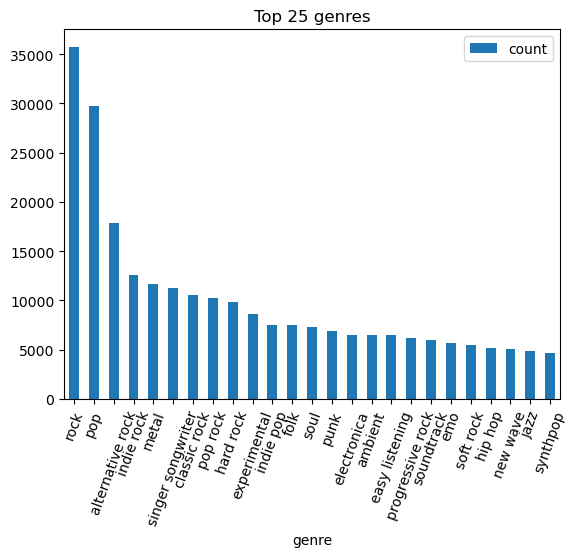

In [7]:
topDF.columns = ['genre', 'count']
topDF.plot.bar(x='genre', y="count", rot=70, title="Top 25 genres");


In [12]:
uniques = (sortedGenDF['count'] == 1).sum(axis=0)
print(uniques)

319


In [13]:
id_genres.to_csv("new_genres_file.tsv", sep = "\t")

In [14]:
ngr = pd.read_csv('id_genres_mmsr.tsv', sep='\t')
ngr_part = ngr



ngr_part['genre_list'] = ngr_part['genre']
print(ngr_part)

    

                     id                                              genre  \
0      0009fFIM1eYThaPg                                            ['pop']   
1      0010xmHR6UICBOYT          ['beats', 'underground hip hop', 'lo fi']   
2      002Jyd0vN4HyCpqL  ['hard rock', 'classic rock', 'rock', 'progres...   
3      006TYKNjNxWjfKjy  ['power metal', 'symphonic metal', 'symphonic ...   
4      007LIJOPQ4Sb98qV  ['post punk', 'new wave', 'dream pop', 'altern...   
...                 ...                                                ...   
76110  zzx8CWdM7qkxKQpC  ['indie rock', 'rock', 'alternative rock', 'in...   
76111  zzyb5LvKJTWLVnrk                            ['soul', 'funk', 'mpb']   
76112  zzz0n04uuTUA7fNh                   ['pop', 'hip hop', 'rap', 'r b']   
76113  zzznMjZAKnJJXQSj                                ['synthpop', 'pop']   
76114  zzzwh2ktIWjsR7xp  ['indie rock', 'rock', 'alternative rock', 'br...   

                                              genre_list  
0   

In [15]:
ngr_part = ngr_part.dropna()    

r = -1
for u in ngr_part['genre']:
    r += 1
    x = re.sub(r"[^a-zA-Z0-9, ]", "", u)
    y = x.split(",")
    genres_list2 = []
    for i in y:
        if i[0] == " ":
            j = i[1:]
            genres_list2.append(j)
        else:
            genres_list2.append(i)
    ngr_part.at[r, 'genre_list'] = genres_list2
    

ngr_part2 = ngr_part.drop(columns=['genre'])

print(ngr_part2)

#ngr_part2.to_csv("new_genreList_file.tsv", sep = "\t")

                     id                                         genre_list
0      0009fFIM1eYThaPg                                              [pop]
1      0010xmHR6UICBOYT                [beats, underground hip hop, lo fi]
2      002Jyd0vN4HyCpqL  [hard rock, classic rock, rock, progressive ro...
3      006TYKNjNxWjfKjy  [power metal, symphonic metal, symphonic power...
4      007LIJOPQ4Sb98qV  [post punk, new wave, dream pop, alternative r...
...                 ...                                                ...
76110  zzx8CWdM7qkxKQpC  [indie rock, rock, alternative rock, indie pop...
76111  zzyb5LvKJTWLVnrk                                  [soul, funk, mpb]
76112  zzz0n04uuTUA7fNh                           [pop, hip hop, rap, r b]
76113  zzznMjZAKnJJXQSj                                    [synthpop, pop]
76114  zzzwh2ktIWjsR7xp  [indie rock, rock, alternative rock, britpop, ...

[76115 rows x 2 columns]


In [29]:
genre_dict = {}
for idx, row in ngr_part2.iterrows():
    genre_dict[row['id']] = row['genre_list']
# dictionary of every song id with according genres

In [31]:
print(genre_dict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
with open('genre_dictionary.pkl', 'wb') as f:
    pickle.dump(genre_dict, f)
#pickled dictionary

In [16]:
for genre in ngr_part2['genre_list'][3]:
    print(genre)

power metal
symphonic metal
symphonic power metal
metal
melodic metal
gothic metal
opera metal
melodic power metal


In [ ]:
artist = 'Dua Lipa'
song_query = 'New Rules (Initial Talk Remix)'
song = id_information.loc[(id_information['artist']==artist)&(id_information['song']==song_query)]

In [ ]:
query_id = '00IeldeA9ijZOL0P' #song.iloc[0]['id']

In [19]:
# query_id has to be a song ID, id_genre_list_dataframe has to be a DF with column ID and 
# a column genre_list where genres added as list
# returns a list that can added to id_genre_list_dataframe with boolean values

def same_genre_column(query_id, id_genre_list_dataFrame):
    same_genre_list = []
    
    genre_list_to_find = id_genre_list_dataFrame[(id_genre_list_dataFrame['id']==query_id)]['genre_list'].tolist()
    genre_list_to_compare = id_genre_list_dataFrame['genre_list']


    for x in genre_list_to_compare:
        same_genre = any(check in x for check in genre_list_to_find[0])
        same_genre_list.append(same_genre)
    
    return same_genre_list


In [20]:

ngr_part['SameGenre'] = same_genre_column(query_id, ngr_part)
print(ngr_part)




                     id                                              genre  \
0      0009fFIM1eYThaPg                                            ['pop']   
1      0010xmHR6UICBOYT          ['beats', 'underground hip hop', 'lo fi']   
2      002Jyd0vN4HyCpqL  ['hard rock', 'classic rock', 'rock', 'progres...   
3      006TYKNjNxWjfKjy  ['power metal', 'symphonic metal', 'symphonic ...   
4      007LIJOPQ4Sb98qV  ['post punk', 'new wave', 'dream pop', 'altern...   
...                 ...                                                ...   
76110  zzx8CWdM7qkxKQpC  ['indie rock', 'rock', 'alternative rock', 'in...   
76111  zzyb5LvKJTWLVnrk                            ['soul', 'funk', 'mpb']   
76112  zzz0n04uuTUA7fNh                   ['pop', 'hip hop', 'rap', 'r b']   
76113  zzznMjZAKnJJXQSj                                ['synthpop', 'pop']   
76114  zzzwh2ktIWjsR7xp  ['indie rock', 'rock', 'alternative rock', 'br...   

                                              genre_list  SameG